# Part 1 Accuracies

|  Setup 	|   Cross_validation Accuracy	|
|---	|---	|
|  Unprocessed data 	|   75.45%	|
|   0-value elements ignored	|   75.83%	|

## part 1A

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('pima-indians-diabetes.csv', header = None, names = 
                 ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

(768, 9)

In [3]:
import random
def train_test_split(dataset, ratio):
    data = dataset.values
    random.shuffle(data)
    size = len(data)
    train_size = int(size * (1 - ratio))
    train_data = data[:train_size, :]
    test_data = data[train_size:, :]
    train = pd.DataFrame(train_data, index = None, 
                         columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
    test = pd.DataFrame(test_data, index = None, 
                        columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
    train[['preg', 'plas', 'pres', 'skin', 'test', 'age', 'class']] =  train[['preg', 
                                                'plas', 'pres', 'skin', 'test', 'age', 'class']].astype(int)
    test[['preg', 'plas', 'pres', 'skin', 'test', 'age', 'class']] = test[['preg', 
                                                'plas', 'pres', 'skin', 'test', 'age', 'class']].astype(int)
    return train, test

In [4]:
def norm_prob(x, mean_y, var_y): ### var = stdv**2
    ###return P(x|y)
    tmp = np.exp(-(x - mean_y) ** 2 / (2 * var_y))
    return 1 / ((2 * np.pi * var_y) ** 0.5) * tmp

In [5]:
def class_prob(xi, data):
    ###return class probability
    prob = {0: 1, 1: 1}
    for i in range(len(xi) - 1): ### xi needs to drop column('class')
        ###P(xi|y) = P(x0|y) * P(x1|y)*...
        prob[0] = prob[0] * norm_prob(xi[i], data['mean_y'].iloc[0][i], data['var_y'].iloc[0][i])
        prob[1] = prob[1] * norm_prob(xi[i], data['mean_y'].iloc[1][i], data['var_y'].iloc[1][i])
    prob[0] *= data['pt']
    prob[1] *= data['pn']
    return prob
def classify(xi, data):
    prob = class_prob(xi, data)
    return 0 if prob[0] > prob[1] else 1

In [6]:
def NBclassifier(dataset, ratio):
    accu_list = []
    for i in range(10):
        train, test = train_test_split(dataset, ratio)
        class_1 = train['class'][train['class'] == 1].count()
        class_0 = train['class'][train['class'] == 0].count()
        class_total = train.shape[0]
        pn = class_1 / float(class_total) ##1:negtaive
        pt = class_0 / float(class_total) ## 0: positive
        mean_y = train.groupby('class').mean()
        var_y = train.groupby('class').var()
        ##std_y = train.groupby('class').std() 
        cor = 0
        for i, j in test.iterrows():
            result = classify(j, {'mean_y': mean_y, 'var_y': var_y, 'pn':pn, 'pt':pt})
            if bool(result) == bool(j['class']):
                cor += 1
        accu_list.append(cor / float(test.shape[0]))
    accuracy = np.sum(accu_list) / 10.0
    return accuracy

In [7]:
accuracy = NBclassifier(df, 0.2)
print('The estimate of accuracy of the classifier is %.2f' %(accuracy * 100) + '%')

The estimate of accuracy of the classifier is 75.84%


## part 1B

In [8]:
df_B = pd.read_csv('pima-indians-diabetes.csv', header = None, 
                   names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
df_B[['pres', 'skin', 'mass', 'age']] = df_B[['pres', 'skin', 'mass', 'age']].replace(0, np.NaN)
df_B = df_B.dropna()
df_B.head()
df_B.shape

(537, 9)

In [9]:
accuracy_B = NBclassifier(df_B, 0.2)

In [10]:
print('The estimate of accuracy of the modified classifier by is %.2f' %(accuracy_B * 100) + '%')

The estimate of accuracy of the modified classifier by is 78.06%


# Part 2 MNIST Accuracies

In [11]:
import mnist
train_x = mnist.train_images()
train_y = mnist.train_labels()

test_x = mnist.test_images()
test_y = mnist.test_labels()

In [12]:
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1] * train_x.shape[2]))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1] * test_x.shape[2]))

In [13]:
#from mnist import MNIST
#mndata = MNIST('/Users/xinqu/Sandbox/CS498 Applied Machine Learning/HW/HW1/python-mnist/data')
#train_x, train_y = mndata.load_training()
#test_x, test_y = mndata.load_testing()

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [15]:
from skimage.transform import resize
def crop_image(x):
    hor_max, ver_max = np.max(np.where(x != 0), 1)
    hor_min, ver_min = np.min(np.where(x != 0), 1)
    bound = x[hor_min: hor_max, ver_min: ver_max]
    resize_x = resize(bound, (20, 20), mode = 'constant')
    return resize_x

In [16]:
def threshold(x):
    y = x.copy()
    grey_y = y[y > 0]  ## remove 0 pixel
    mid_grey = sum(grey_y) / len(grey_y)
    y[y < mid_grey] = 0
    y[y > 0] = 1
    return y

In [17]:
import numpy as np
train_x = np.array(train_x).astype(np.uint8)
train_y = np.array(train_y).astype(np.uint8)
test_x = np.array(test_x).astype(np.uint8)
test_y = np.array(test_y).astype(np.uint8)

In [18]:
##untouched image
###threshold pixel
train_x_thre = []
for x in train_x:
    train_x_thre.append(x)
train_x_thre = np.array([threshold(x) for x in train_x_thre])
test_x_thre = []
for x in test_x:
    test_x_thre.append(x)
test_x_thre = np.array([threshold(x) for x in test_x_thre])

In [19]:
##stretched image
###crop image
train_x_crop = []
test_x_crop = []
for x in train_x.reshape(-1, 28, 28):
    train_x_crop.append(np.ravel(crop_image(x)))
for x in test_x.reshape(-1, 28, 28):
    test_x_crop.append(np.ravel(crop_image(x)))
test_x_crop = np.array(test_x_crop)
###
train_x_crop_thre = np.array([threshold(x) for x in train_x_crop])
test_x_crop_thre = np.array([threshold(x) for x in test_x_crop])

/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [20]:
##GaussianNB parameters
### class probability calculation
from collections import Counter
count_dic = Counter(train_y)
prob = []
for i in count_dic.keys():
    p = count_dic[i] / float(sum(count_dic.values()))
    prob.append(p)
prob = np.array(prob)
prob

array([0.09871667, 0.11236667, 0.0993    , 0.10218333, 0.09736667,
       0.09035   , 0.09863333, 0.10441667, 0.09751667, 0.09915   ])

In [21]:
model = GaussianNB()
model.fit(train_x_thre, train_y) ##fit untouched train set
#model.fit(train_x_crop_thre, train_y) ##fit stretched train set
prob = model.class_prior_
mean = model.theta_
var = model.sigma_
model_B = BernoulliNB()
model_B.fit(train_x_thre, train_y) ##fit untouched train set
#model_B.fit(train_x_crop_thre, train_y) ##fit stretched train set
lpg_p_class = model_B.class_log_prior_
log_p_feature = model_B.feature_log_prob_

In [22]:
def accuracyscore(x, y):
    return sum(x == y) / float(len(y))

In [23]:
###GaussianNB untouched accuracy score train_set
model = GaussianNB()
model.fit(train_x_thre, train_y)
accuracy_score(map(int, train_y), model.predict(train_x_thre))

0.54855

In [60]:
def Gaussiannb_predict(trainset, testset):
    def norm_prob_cal(x, mean_y, var_y): ### var = stdv**2
        ###return P(x|y)
        tmp = np.exp(-(x - mean_y) ** 2 / (2 * var_y))
        return 1 / ((2 * np.pi * var_y) ** 0.5) * tmp
    #model_nb = GaussianNB()#model_nb.fit(trainset, train_y)
    #mean = model_nb.theta_  ### mean values (10, 784)
    #var = model_nb.sigma_   ### var values  (10, 784)
    #pro = model_nb.class_prior_ ###prob of each class (10) 
    from collections import Counter
    count_dic = Counter(testset)
    prob = []
    for i in count_dic.keys():
        p = count_dic[i] / float(sum(count_dic.values()))
        prob.append(p)
    prob = np.array(prob)
    columns = [str(i) for i in range(trainset.shape[1])]
    df = pd.DataFrame(trainset, index = None, columns = columns)
    df['class'] = testset
    mean_ = df.groupby('class').mean()
    var_ = df.groupby('class').var()
    pro = prob
    mean = mean_
    var = var_
    pred_y = []
    ###return predict of trainset
    for i in range(len(trainset)):
        norm_prob = norm_prob_cal(trainset[i], mean, var)
        norm_prob = norm_prob.replace(np.NaN, 1)
        norm_log_prob = np.log(norm_prob)
        p = np.sum(norm_log_prob, axis = 1) + np.log(pro)
        pred_y.append(np.argmax(p))
    return pred_y      

In [61]:
accuracyscore(Gaussiannb_predict(train_x_thre, train_y), train_y) ###Gaussian train set untouched          

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


0.7775333333333333

In [62]:
accuracyscore(Gaussiannb_predict(train_x_crop_thre, train_y), train_y) ###Gaussian train set stretched 

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


0.79585

In [63]:
accuracyscore(Gaussiannb_predict(test_x_thre, test_y), test_y) ###Gaussian test set untouched

0.7975

In [64]:
accuracyscore(Gaussiannb_predict(test_x_crop_thre, test_y), test_y) ###Gaussian test set stretched

0.8206

In [32]:
def Bernoulli_pred(trainset_x, trainset_y):
    #model = BernoulliNB()
    #model.fit(trainset, train_y)
    #log_p_class = model.class_log_prior_
    #log_p_feature = model.feature_log_prob_ 
    columns = [str(i) for i in range(trainset_x.shape[1])]
    df = pd.DataFrame(trainset_x, index = None, columns = columns)
    df['class'] = trainset_y
    count_dic = Counter(trainset_y)
    prob = []
    for i in count_dic.keys():
        p = count_dic[i] / float(sum(count_dic.values()))
        prob.append(p)
    prob = np.array(prob)
    log_p_class = np.log(prob)
    class_dic = Counter(trainset_y)
    class_count = np.array(count_dic.values())
    feature_count = np.array(df.groupby('class').sum())
    log_p_feature = np.log(feature_count + 1.0) - np.log((class_count + 2.0).reshape(-1, 1))
    lpg_p_feature = np.array(log_p_feature)
    pred = []
    for i in range(len(trainset_x)):
        tmp = trainset_x[i] * log_p_feature + (1 - trainset_x[i]) * np.log((1 - np.exp(log_p_feature)))
        total_tmp = np.sum(tmp, axis = 1)
        p = total_tmp + log_p_class
        pred.append(np.argmax(p))
    return pred

In [33]:
accuracyscore(Bernoulli_pred(train_x_thre, train_y), train_y)## Bernoulli untouched train set

0.8376833333333333

In [34]:
accuracyscore(Bernoulli_pred(test_x_thre, test_y), test_y)## Bernoulli untouched test set

0.8517

In [35]:
accuracyscore(Bernoulli_pred(train_x_crop_thre, train_y), train_y)## Bernoulli stretched train set

0.8250333333333333

In [36]:
accuracyscore(Bernoulli_pred(test_x_crop_thre, test_y), test_y)## Bernoulli stretched test set

0.8415

In [37]:
###GaussianNB stretched accuracy score train_set
model = GaussianNB()
model.fit(train_x_crop_thre, train_y)
accuracy_score(map(int, train_y), model.predict(train_x_crop_thre))

0.79525

In [38]:
###GaussianNB untouched accuracy score test_set
model = GaussianNB()
model.fit(train_x_thre, train_y)
pred_y = model.predict(test_x_thre)
accuracy_score(map(int, test_y), pred_y)

0.5399

In [39]:
###GaussianNB stretched accuracy score test_set
model = GaussianNB()
model.fit(train_x_crop_thre, train_y)
pred_y = model.predict(test_x_crop_thre)
accuracy_score(map(int, test_y), pred_y)

0.8075

In [40]:
###BernoulliNB untouched accuracy score train_set
model = BernoulliNB()
model.fit(train_x_thre, train_y)
accuracy_score(map(int, train_y), model.predict(train_x_thre))

0.8376833333333333

In [41]:
###BernoulliNB stretched accuracy score train_set
model = BernoulliNB()
model.fit(train_x_crop_thre, train_y)
accuracy_score(map(int, train_y), model.predict(train_x_crop_thre))

0.8250333333333333

In [42]:
###BernoulliNB untouched accuracy score test_set
model = BernoulliNB()
model.fit(train_x_thre, train_y)
pred_y = model.predict(test_x_thre)
accuracy_score(map(int, test_y), pred_y)

0.8487

In [43]:
###BernoulliNB stretched accuracy score test_set
model = BernoulliNB()
model.fit(train_x_crop_thre, train_y)
pred_y = model.predict(test_x_crop_thre)
accuracy_score(map(int, test_y), pred_y)

0.8381

In [44]:
###compare with library build-in predict function
dataset = [(train_x_thre, test_x_thre, 'untouched'), (train_x_crop_thre, test_x_crop_thre, 'stretched')]
from collections import defaultdict
result = defaultdict(list)
for (train, test, name) in dataset:
    for model in [GaussianNB(), BernoulliNB()]:
        model.fit(train, train_y)
        pred_y = model.predict(test)
        train_score = accuracy_score(map(int, train_y), model.predict(train))
        test_score = accuracy_score(map(int, test_y), pred_y)
        result[name].append((train_score, test_score))
print(result)
### result {'untouched': [(Gaussian_train_accu, Gaussian_test_accu), 
###                       (Bernoulli_train_accu, Bernoulli_test_accu)], 
###         'stretched': [(Gaussian_train_accu, Gaussian_test_accu), 
###                       (Bernoulli_train_accu, Bernoulli_test_accu)]}

defaultdict(<type 'list'>, {'untouched': [(0.54855, 0.5399), (0.8376833333333333, 0.8487)], 'stretched': [(0.79525, 0.8075), (0.8250333333333333, 0.8381)]})


## plot mean pixel values for Normal Distribution

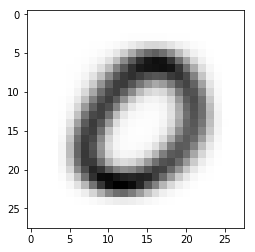

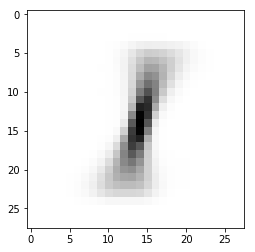

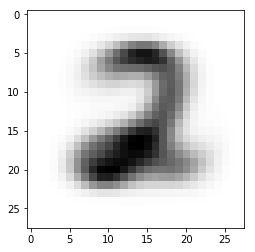

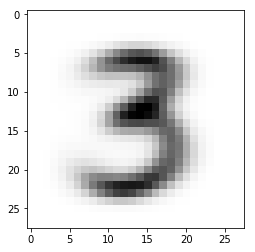

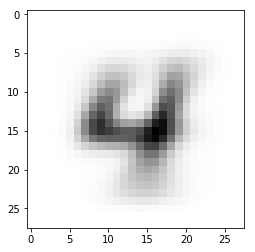

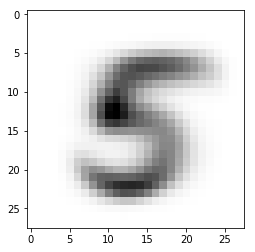

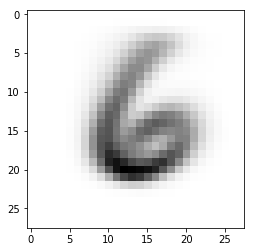

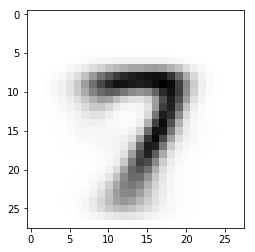

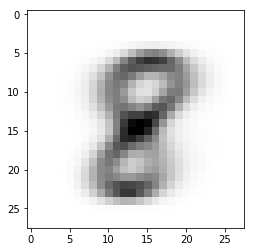

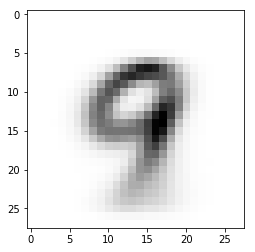

In [53]:
columns = [str(i) for i in range(train_x_thre.shape[1])]
df = pd.DataFrame(train_x_thre, index = None, columns = columns)
df['class'] = train_y
mean_ = np.array(df.groupby('class').mean())
for i in range(len(mean_)):
    image = mean_[i]
    plt.imshow(image.reshape((28, 28)), cmap = 'Greys')
    plt.show()

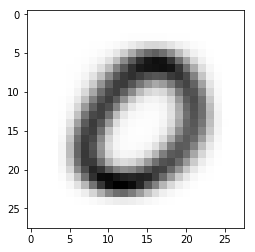

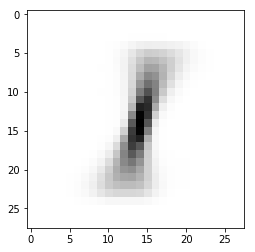

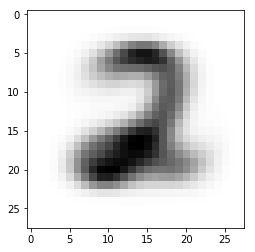

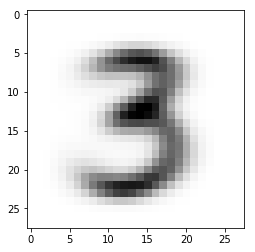

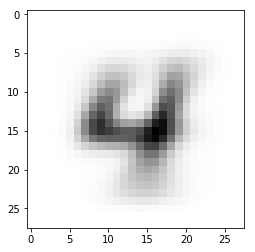

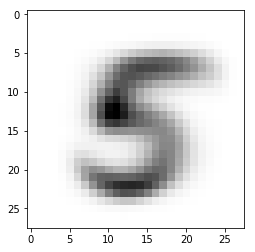

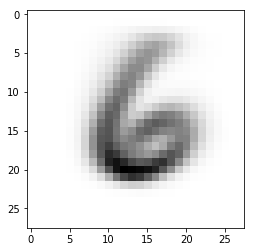

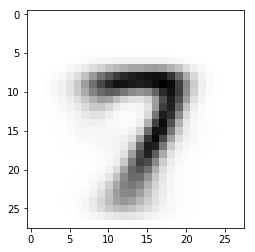

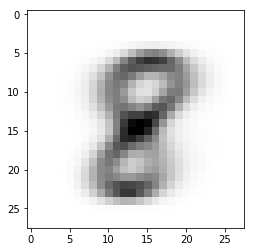

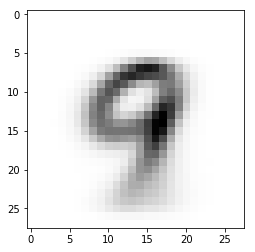

In [49]:
##plot mean pixel values for Normal Distribution
model = GaussianNB()
model.fit(train_x_thre, train_y)
mean = model.theta_
for i in range(len(mean)):
    image = mean[i]
    plt.imshow(image.reshape((28, 28)), cmap = 'Greys')
    plt.show()

## Part 2B: MNIST using Decision Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
import itertools
trees = [10, 30]
depth = [4, 16]
combinations = list(itertools.product(trees, depth))
combinations

[(10, 4), (10, 16), (30, 4), (30, 16)]

In [48]:
resultB = defaultdict(list)
for (train, test, name) in dataset:
    for [tree, depth] in combinations:
        model = RandomForestClassifier(n_estimators = tree, max_depth = depth)
        model.fit(train, train_y)
        pred_y = model.predict(test)
        train_score = accuracy_score(map(int, train_y), model.predict(train))
        test_score = accuracy_score(map(int, test_y), pred_y)
        resultB[name].append((train_score, test_score))
print(resultB)
###resultB = {'untouched': [(train_accu 10trees + 4depth, test_accu 10trees + 4depth), 
###                         (train_accu 10trees + 16depth, test_accu 10trees + 16depth), 
###                         (train_accu 30trees + 4depth, test_accu 30trees + 4depth), 
###                         (train_accu 30trees + 16depth, test_accu 30trees + 4depth)], 
###           'stretched': [(train_accu 10trees + 4depth, test_accu 10trees + 4depth), 
###                         (train_accu 10trees + 16depth, test_accu 10trees + 16depth), 
###                         (train_accu 30trees + 4depth, test_accu 30trees + 4depth), 
###                         (train_accu 30trees + 16depth, test_accu 30trees + 4depth)}

defaultdict(<type 'list'>, {'untouched': [(0.6677666666666666, 0.6757), (0.9872, 0.9358), (0.7178666666666667, 0.7212), (0.9923, 0.9494)], 'stretched': [(0.6977833333333333, 0.7161), (0.99515, 0.9566), (0.74645, 0.7548), (0.99705, 0.9681)]})
